In [66]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [67]:
df = pd.read_csv('../data/datatran_2016-2017.csv', dtype={'br_str': str})
df.shape

/Users/leportella/.virtualenvs/data/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(180991, 32)

In [68]:
class0 = df[df.target==0].sample(10291*2)
class1 = df[df.target==1].sample(10291)
class2 = df[df.target==2]

df2 = shuffle(pd.concat([class0, class1, class2]))

df2[df2.target==2] = 1

In [69]:
dd = df2[['weekday', 'uf', 'km_int', 'accident_type', 
          'climate', 'ano', 'mes', 'dia', 'hora', 'target']]
dd = dd.dropna()

In [70]:
dd.target.value_counts()

1    20582
0    20582
Name: target, dtype: int64

In [71]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()


parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 500]
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

In [74]:
y_pred = best_clf.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.7974007044819629

Confusion matrix, without normalization
[[3918  196]
 [1472 2647]]


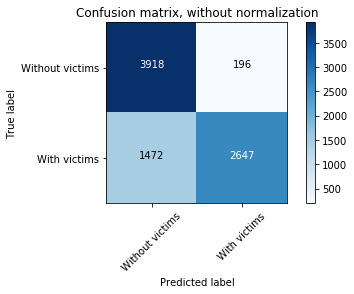

In [80]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Without victims', 'With victims'],
                      title='Confusion matrix, without normalization')

In [77]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.95      0.82      4114
          1       0.93      0.64      0.76      4119

avg / total       0.83      0.80      0.79      8233



In [78]:
importances = pd.DataFrame({'col': X_test.columns, 'importances': best_clf.feature_importances_})
importances.sort_values(by='importances', ascending=False)

,col,importances
0,km_int,0.163481
4,hora,0.079183
1,ano,0.053814
3,dia,0.047167
2,mes,0.036010
58,accident_type_transversal collision,0.025855
60,accident_type_vehicle occupant fall,0.024087
53,accident_type_pedestrian trampling,0.023836
59,accident_type_vehicle fall,0.023607
43,accident_type_bike collision,0.023465
